# Интегрирование дифференциальных уравнений и построение графиков
К курсовой работе "Исследование движения точки и механической системы"

[Кафедра теоретической механики](http://termech.ru)

[Самарский университет](http://ssau.ru)


In [1]:
# Модуль для работы с массивами (array)
import numpy as np

# Модуль с функциями интегрирования дифференциальных уравнений
from scipy.integrate import solve_ivp

## Система с одной степенью свободы

### Схема системы

Пластина вращается вокруг оси по известному закону $\varphi(t)$. В канале пластины движется шарик М, закреплённый на пружине.

![alt](model.png)

### Уравнения движения 

В общем случае (при движении пластины с известной угловой скоростю $\omega$ и ускорением $\varepsilon$) уравнения относительного движения шарика (относительно подвижной системы координат $Oxy$, связанной с пластиной) имеют следующий вид:

$$
\left\{
\begin{align}
& m \ddot x = G \sin \varphi - P - F_{f} + \Phi_e^n \sin \psi + \Phi_e^\tau \cos \psi \\
& m \ddot y = G \cos \varphi + N_y + \Phi_e^n \cos \psi - \Phi_e^\tau \sin \psi - \boldsymbol{\Phi}_c \\
& m \ddot z = N_z
\end{align}
\right.
$$

$m$ - масса шарика

$\boldsymbol P$ - сила упругости пружины
$$
    P = c x
$$

$\boldsymbol F_f$ - сила трения скольжения
$$
    F_f = \text{sign} (V_r) f \sqrt{N_y^2 + N_z^2}
$$

$\boldsymbol G$ - сила веса
$$
     G = m g
$$

$\boldsymbol \Phi_e^n$ - переносная центробежная сила инерции
$$
    \Phi_e^n = m \omega^2 (O_1M) = m \omega^2 \frac{O_1K}{\cos \psi}
$$

$\boldsymbol \Phi_e^\tau$ - переносная вращательная сила инерции
$$
    \Phi_e^\tau = m \varepsilon (O_1M) = m \varepsilon \frac{O_1K}{\cos \psi}
$$

$$
AK = \sqrt{R^2 - h^2}, \quad KM = (x + l_0) - AK, \quad \psi = \arctan \frac{KM}{O_1 K}
$$

Движение шарика происходит вдоль оси $x$, поэтому $y=0$. Из второго уравнения системы выразим $N_y$:

$$
    N_y = \Phi_e^\tau \sin \psi - G \cos \varphi - \Phi_e^n \cos \psi + \boldsymbol{\Phi}_c
$$

Дифференциальное уравнение второго порядка, описывающее движения шарика вдоль оси $Ox$

$$
m \ddot x = m g \sin \varphi - c x - \text{sign}(V_r) f (\Phi_e^\tau \sin \psi - G \cos \varphi - \Phi_e^n \cos \psi) + \Phi_e^n \sin \psi + \Phi_e^\tau \cos \psi = f(x,\dot x, t)
$$

Система дифференциальных уравнений первого порядка

$$
\left\{
\begin{align}
& \dot x = V_x \\
& \dot V_x = f(x, V_x, t)
\end{align}
\right.
$$


Вектор состояния системы в момент времени $t$
$$
\boldsymbol q(t) = \begin{bmatrix}x \\ V_x\end{bmatrix}
$$

Дифференциальные уранвения в векторной форме
$$
\frac{d \boldsymbol q}{dt} = \boldsymbol f(\boldsymbol q, t)
$$

### Функция правых частей
Для $\varphi = \omega t$, $\omega = \text{const}$

In [2]:
def dqdt(t, q):
    # Функция правых частей f(q,t)
    # Аргументы функции:
    # t - время
    # q - вектор состояния системы для момента времени t. 
    # Для системы с одной степенью свободы это координата шарика x и его скорость vx
    x   = q[0]
    vx  = q[1]
    
    # Параметры системы
    g   = 9.807   # ускорение свободного падения
    m   = 0.5     # масса шарика
    w   = 2*np.pi # угловая скорость пластины
    c   = 150     # жёсткость пружины
    L0  = 0.025   # свободная длина пружины
    R   = 0.1     # радиус пластины
    phi = w*t     # Угол поворота     
    f   = 0.0     # Коэффициент трения
        
    # Силы реакции 
    Ny = m*(2*w*vx-g*np.cos(phi)-w*w*R)
    Nz = 0
    # Модуль силы реакции (для вычисления силы трения)
    N  = np.sqrt(Ny**2+Nz**2) 
    
    # Ускорение шарика
    ax  = g*np.sin(w*t) - x*c/m - f*np.sign(vx)*N/m + w*w*(L0+x-np.sqrt(3)*0.5*R)
        
    # аргумент функции - вектор q содержит координату и скорость,
    # возвращаем производную от q - скорость и ускорение    
    return (vx, ax)

### Интегрирование

Запуск процесса интегрирования - функция [solve_ivp](https://www.google.ru/search?q=solve_ivp&ie=utf-8&oe=utf-8&gws_rd=cr&dcr=0&ei=gi-iWp-QHsidsgHexavoDQ)

Порядковые аргументы
1. имя функции правой части системы ДУ
2. интервал интегрирования от t0 до tN
3. вектор начальных условий

**rtol** - относительная погрешность 
**atol** - абсолютная погрешность

Ошибка на шаге интегрирования не превышает:
atol + rtol * abs(y)

По умолчанию используется метод Рунге-Кутты с контролем точности и автоматическим выбором шага

In [3]:
sol = solve_ivp(dqdt, [0, 5], [0, 0], rtol = 1e-4, atol = 1e-4)
sol.y[1][-1]

0.24283778734839473

In [4]:
sol = solve_ivp(dqdt, [0, 5], [0, 0], rtol = 1e-5, atol = 1e-5)
sol.y[1][-1]

0.24754889597116814

In [5]:
sol = solve_ivp(dqdt, [0, 5], [0, 0], rtol = 1e-6, atol = 1e-6)
sol.y[1][-1]

0.24796152951961886

In [6]:
# Результат работы функции solve_ivp - структура c с результатами интегрирования:
sol

  message: 'The solver successfully reached the interval end.'
     nfev: 1640
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       3.37270961e-02, 5.70011760e-02, 8.57306416e-02, 1.08827924e-01,
       1.31925207e-01, 1.55022490e-01, 1.78119772e-01, 2.01217055e-01,
       2.25052084e-01, 2.52790075e-01, 2.76162266e-01, 2.96821167e-01,
       3.17480068e-01, 3.38138969e-01, 3.58797870e-01, 3.79456771e-01,
       4.00116761e-01, 4.21863943e-01, 4.45391592e-01, 4.72825037e-01,
       4.96950104e-01, 5.18592176e-01, 5.40234248e-01, 5.61876320e-01,
       5.83518392e-01, 6.05160464e-01, 6.26802536e-01, 6.50276469e-01,
       6.79011911e-01, 7.01917362e-01, 7.24822814e-01, 7.47728266e-01,
       7.70633718e-01, 7.93539170e-01, 8.18201044e-01, 8.45464691e-01,
       8.67311906e-01, 8.89159121e-01, 9.11006336e-01, 9.32853551e-01,
       9.54700767e-01, 9.76547982e-01, 9.98502517e-01, 1.0

In [47]:
# Массив времени 1xN
# первый элемент массива - начальное значение времени t0
# последний элемент массива - конечное значение времени интегрирования tN
# [t0, t1, ..., tN]
sol.t

array([0.        , 0.00892748, 0.02071473, 0.03250199, 0.04435828,
       0.0565395 , 0.06925632, 0.08282635, 0.09816267, 0.11137259,
       0.12458251, 0.13589961, 0.14721671, 0.15853381, 0.16985092,
       0.18116802, 0.19263654, 0.20456109, 0.2171251 , 0.23075328,
       0.24461494, 0.25645508, 0.26829522, 0.28013536, 0.2919755 ,
       0.30381564, 0.31565998, 0.32808024, 0.34105135, 0.35472549,
       0.3700705 , 0.38309874, 0.39613115, 0.40776602, 0.41940415,
       0.43104228, 0.44268041, 0.45437859, 0.46635006, 0.47875337,
       0.49188863, 0.50636583, 0.52281965, 0.5356803 , 0.5471129 ,
       0.55854551, 0.56997811, 0.58015269, 0.59032726, 0.60054408,
       0.61093586, 0.62158656, 0.63252179, 0.64379656, 0.65562099,
       0.66842886, 0.68330708, 0.69705332, 0.71079956, 0.72284902,
       0.73489847, 0.74694793, 0.75899739, 0.77104685, 0.78319633,
       0.79595953, 0.80958527, 0.82396389, 0.83865398, 0.85176366,
       0.86487335, 0.87622893, 0.8875845 , 0.89894008, 0.91029

In [8]:
# Массив состояний 2xN
# Массив значений x 
# Массив значений Vx 
# [[x0 ,  x1, ...,xN ],
#   Vx0, Vx1, ...,VxN]]
sol.y

array([[ 0.00000000e+00, -1.21495816e-08, -1.45763475e-06,
        -1.35401836e-04, -9.62057589e-04, -1.86875029e-03,
        -1.80917256e-03, -4.93393246e-06,  3.77880472e-03,
         9.56667004e-03,  1.70279449e-02,  2.55122389e-02,
         3.43973027e-02,  4.34421285e-02,  4.87923164e-02,
         5.10755914e-02,  5.06670674e-02,  4.74229856e-02,
         4.14484519e-02,  3.30901030e-02,  2.29025880e-02,
         1.09839910e-02, -2.23859148e-03, -1.65845821e-02,
        -2.70678870e-02, -3.41338199e-02, -3.87334994e-02,
        -4.09176974e-02, -4.10079814e-02, -3.95470653e-02,
        -3.72230355e-02, -3.45870742e-02, -3.24362968e-02,
        -3.23165375e-02, -3.39393402e-02, -3.72519846e-02,
        -4.18697026e-02, -4.71263739e-02, -5.25162511e-02,
        -5.67895865e-02, -5.80059871e-02, -5.66574065e-02,
        -5.24521838e-02, -4.53943879e-02, -3.57929764e-02,
        -2.42343018e-02, -1.14573594e-02,  2.61161463e-03,
         1.77601598e-02,  2.82591056e-02,  3.51541014e-0

### Построение графиков

In [11]:
# Модуль для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

#
# Зададим параметры графиков по умолчанию
#
# Ширина и высота графика в дюймах
plt.rcParams["figure.figsize"] = (15/2.5,10/2.5)
# Размер шрифта
plt.rcParams["font.size"] = 14
# Тип шрифта
plt.rcParams["font.family"] = 'Arial'

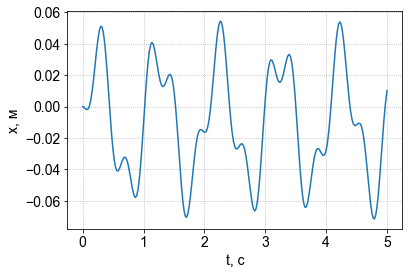

In [12]:
plt.plot(sol.t,sol.y[0])
plt.xlabel('t, c');
plt.ylabel('x, м');
plt.grid(True,linestyle='dotted');

Добавляем ["легенду"](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

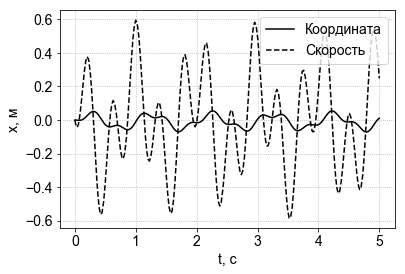

In [13]:
plt.plot(sol.t,sol.y[0],'k-',   sol.t,sol.y[1],'k--');
plt.xlabel('t, c');
plt.ylabel('x, м');
plt.grid(True,linestyle='dotted');
# 
plt.legend(('Координата','Скорость'));

Использование LaTeX-разметки для математических символов

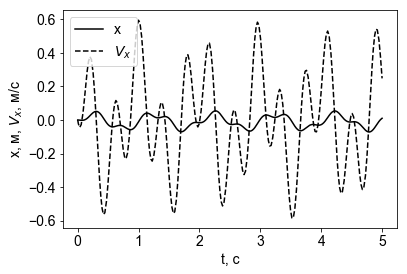

In [14]:
plt.plot(sol.t,sol.y[0],'k-',sol.t,sol.y[1],'k--');
plt.xlabel('t, c');
plt.ylabel('x, м, $V_x$, м/c');
plt.legend(('x','$V_x$'));
#
# Сохраняем рисунок в файл 
#
plt.savefig("x_Vx.png",dpi=300)

Две оси y с разным масштабом

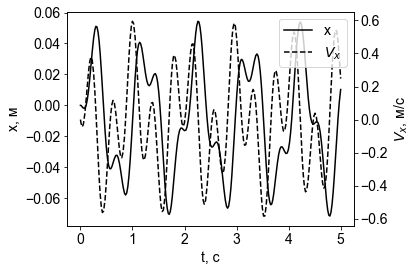

In [15]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(sol.t,sol.y[0],'k-', label='x');
ax1.set_xlabel('t, c');
ax1.set_ylabel('x, м');

ax2 = ax1.twinx()
line2 = ax2.plot(sol.t,sol.y[1],'k--', label='$V_x$')
ax2.set_ylabel('$V_x$, м/с')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout()
plt.show()

### Передача параметров в функцию правых частей

Для исследования влияния параметров на движение системы было бы удобнее параметы системы задавать вне функции правых частей. 
Для хранения параметров можно использовать объект типа [namedtuple](https://habrahabr.ru/post/330034/) из модуля [collections](https://docs.python.org/3/library/collections.html#collections.namedtuple)

In [16]:
from collections import namedtuple

# Создаем структуру данных 
Parameters = namedtuple('Parameters', 'g, m, w, c, L0, R, f')

# Создаем набор параметров
p1 = Parameters(9.81,0.5,2*np.pi,150,0.025,0.1,0.0)
# или так
p1 = Parameters(g = 9.81, m = 0.5, w = 2*np.pi, c = 100, L0 = 0.025, R = 0.1, f = 0.0)

# Ещё один набор параметров (с другой жёсткостью пружины)
p2 = Parameters(g = 9.81, m = 0.5, w = 2*np.pi, c = 200, L0 = 0.025, R = 0.1, f = 0.0)

p2.w

6.283185307179586

In [17]:
# Как и классический tuple (кортеж), именованный кортеж не изменяем
p2.g = 10

AttributeError: can't set attribute

Функция правых частей дифференциальных уравнений с тремя параметрами 

In [18]:
def dqdt(t, q, p):
    # Функция правых частей
    # t - текущее время
    # q - вектор состояния системы
    # p - параметры системы
    # для системы с одной степенью свободы это координата шарика и его скорость
    x  = q[0]
    vx = q[1]
    
    # Для удобства все параметры извлекаем из именованного кортежа в отдельные переменные
    g, m, w, c, L0, R, f = list(p)

    phi = w*t    # Угол поворота     

    Ny = m*(2*w*vx-g*np.cos(phi)-w*w*R)
    Nz = 0
    N  = np.sqrt(Ny**2+Nz**2)     
    # Вычисляем ускорение шарика
    ax  = g*np.sin(w*t) - x*c/m - f*np.sign(vx)*N/m + w*w*(L0+x-np.sqrt(3)*0.5*R)
   
    # q содержит координату и скорость,
    # возвращаем производную от q - скорость и ускорение    
    return (vx, ax)

In [19]:
# Решение для первого набора параметров
sol1 = solve_ivp(lambda t, q: dqdt(t, q, p1), [0, 5], [0, 0], rtol = 1e-6)

# Решение для второго набора параметров
sol2 = solve_ivp(lambda t, q: dqdt(t, q, p2), [0, 5], [0, 0], rtol = 1e-6)

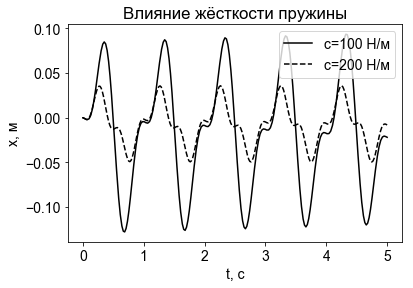

In [20]:
plt.plot(sol1.t, sol1.y[0], 'k-', sol2.t, sol2.y[0],'k--');
plt.legend(['c=100 Н/м','c=200 Н/м']);
plt.ylabel('x, м');
plt.xlabel('t, c');
plt.title('Влияние жёсткости пружины');


### Сила реакции

Вариант 1.

Вычисляем реакцию для каждой строки результата интегрирования.

In [21]:
def Ny(t, q, p):
    # t - время
    # q - массив из двух элементов (x, Vx)
    g, m, w, c, L0, R, f = list(p)
    return 2*m*w*q[1] - m*g*np.cos(w*t) - m*w*w*R

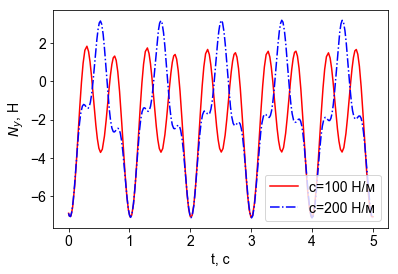

In [22]:
# Склеиваем таблицу времени (строку 1xN) с таблицей решения (матрица 2xN)
# Транспонируем результат
# Получаем матрицу Nx3, каждая строка которой содержит решение для заданного момента времени
# t0 x(t0) vx(t0)
# t1 x(t1) vx(t1)
# t2 x(t2) vx(t2)
# ...
# tN x(tN) vx(tN)
data1 = np.vstack((sol1.t,sol1.y)).T;

# Вызываем функцию  Ny(t, q, p) для каждой строки получнной "матрицы"
sol1_Ny = list(map( lambda row: Ny(row[0],row[1:],p1), data1 ))

# Для второго набора параметров
data2 = np.vstack((sol2.t,sol2.y)).T;
sol2_Ny = list(map( lambda row: Ny(row[0],row[1:],p2), data2 ))

# Строим график
plt.plot(sol1.t,sol1_Ny,'r-',sol2.t,sol2_Ny,'b-.');
plt.xlabel('t, c');
plt.ylabel('$N_y$, Н');
plt.legend(['c=100 Н/м','c=200 Н/м']);

In [23]:
# Функция, которую можно вызвать сразу для всех значений таблицы решения
def Ny(t, q, p):
    # t - массив t0, t1, t2, ... tN
    # q - массив [ [ x(t0), x(t1), x(t2), ..., x(tN) ], [ vx(t0), vx(t1), ..., vx(tN) ] ]    
    g, m, w, c, L0, R, f = list(p)
    return 2*m*w*q[1,:] - m*g*np.cos(w*t) - m*R*w**2

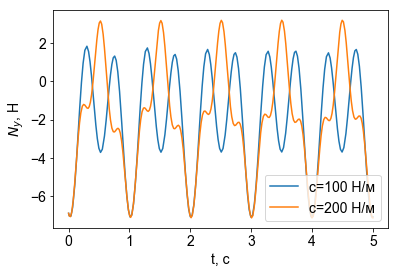

In [24]:
plt.plot(sol1.t,Ny(sol1.t,sol1.y,p1), sol2.t,Ny(sol2.t,sol2.y,p2));
plt.xlabel('t, c');
plt.ylabel('$N_y$, Н');
plt.legend(['c=100 Н/м','c=200 Н/м'],loc='lower right');

### Аппроксимация функции sign гладкой функцией 

Численные методы интегрирования дифференциальных уравнений требуют, чтобы правая часть - функция $f(t,q)$ была гладкой функцией своих аргументов. 

Включение в правую часть функций $\text{sign}$  может приводить к увеличению погрешности интегрирования.

Зададим коэффициент трения равный 0,1 и проинтегрируем дифференциальное уравнение, используя многошаговый метод Адамса 

In [25]:
p1 = Parameters(g = 9.81, m = 0.5, w = 2*np.pi, c = 100, L0 = 0.025, R = 0.1, f = 0.1)

In [26]:
sol = solve_ivp(lambda t, q: dqdt(t, q, p1), [0, 5], [0, 0], rtol = 1e-6, method = 'BDF')
sol.y[0][-1]

-30.39956397819594

In [27]:
sol = solve_ivp(lambda t, q: dqdt(t, q, p1), [0, 5], [0, 0], rtol = 1e-6, method = 'RK45')
sol.y[0][-1]

-0.024380140540061025


[Сигмоида](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0)

$$
    S(x) = \frac{1}{1+e^{-x}}
$$

In [28]:
x = np.linspace(-10,10,100)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

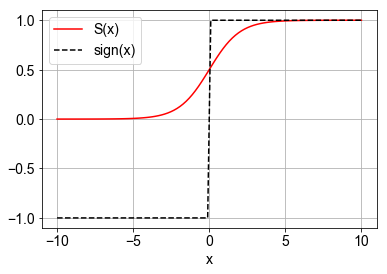

In [29]:
plt.plot(x, sigmoid(x),'r-', x, np.sign(x), 'k--');
plt.grid()
plt.xlabel('x')
plt.legend(['S(x)','sign(x)']);

$$
    S(x) = 2 \left( \frac{1}{1+e^{-k x}} - \frac{1}{2} \right)
$$

In [48]:
# Сигмоида с параметром 
def sigmoid(x , k = 1):
    return (1.0 / (1.0 + np.exp(-k*x)) - 0.5)*2

sigmoid(-1,10000)

C:\Users\kidinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


-1.0

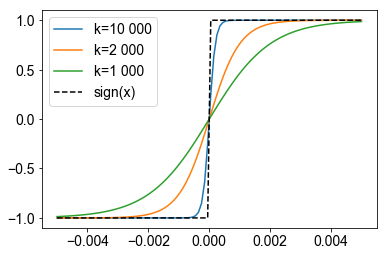

In [49]:
x = np.linspace(-0.005,0.005,100)

plt.plot(x,sigmoid(x,10000),x,sigmoid(x,2000),x,sigmoid(x,1000), x, np.sign(x),'k--');
plt.legend(['k=10 000','k=2 000','k=1 000','sign(x)']);

In [32]:
def dqdt(t, q, p):
    # Функция правых частей
    # t - текущее время
    # q - вектор состояния системы
    # p - параметры системы
    # для системы с одной степенью свободы это координата шарика и его скорость
    x  = q[0]
    vx = q[1]
    
    # Для удобства все параметры извлекаем из именованного кортежа в отдельные переменные
    g, m, w, c, L0, R, f = list(p)

    phi = w*t    # Угол поворота     

    Ny = m*(2*w*vx-g*np.cos(phi)-w*w*R)
    Nz = 0
    N  = np.sqrt(Ny**2+Nz**2)     
    # Вычисляем ускорение шарика
    ax  = g*np.sin(w*t) - x*c/m - f*sigmoid(vx,10000)*N/m + w*w*(L0+x-np.sqrt(3)*0.5*R)
   
    # q содержит координату и скорость,
    # возвращаем производную от q - скорость и ускорение    
    return (vx, ax)

In [33]:
p1 = Parameters(g = 9.81, m = 0.5, w = 2*np.pi, c = 100, L0 = 0.025, R = 0.1, f = 0.1)
sol = solve_ivp(lambda t, q: dqdt(t, q, p1), [0, 5], [0, 0], rtol = 1e-7, method = 'BDF')
sol.y[0][-1]

C:\Users\kidinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


-0.024553027599079263

In [34]:
sol = solve_ivp(lambda t, q: dqdt(t, q, p1), [0, 5], [0, 0], rtol = 1e-7, method = 'RK45')
sol.y[0][-1]

C:\Users\kidinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


-0.024499724749321435

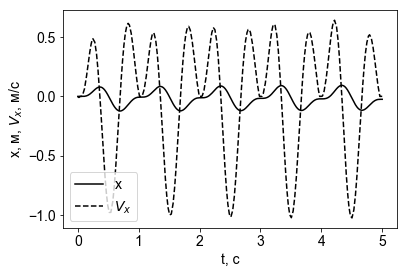

In [35]:
plt.plot(sol.t,sol.y[0],'k-',sol.t,sol.y[1],'k--');
plt.xlabel('t, c');
plt.ylabel('x, м, $V_x$, м/c');
plt.legend(('x','$V_x$'));

## Система с двумя степенями свободы 

![alt](model2.png)

Уравнения движения запишем в форме уравнений Лагранжа второго рода:

$$
    \frac{d}{dt} \frac{\partial T}{\partial \dot \varphi} - \frac{\partial T}{\partial \varphi} = - \frac{\partial \Pi}{\partial \varphi}
$$

$$
\frac{d}{dt} \frac{\partial T}{\partial \dot x} - \frac{\partial T}{\partial x} = - \frac{\partial \Pi}{\partial x}
$$

Кинетическая энергия системы

$$
  T = \frac{1}{2} m_2\left(\dot{\varphi}^2 \left(l_0-\frac{\sqrt{3} R}{2}+x\right)^2+\left(\dot x - R \dot{\varphi}\right)^2\right)+\frac{3}{8} m_1 R^2 \dot{\varphi}^2
$$

Потенциальная энергия системы

$$
  \Pi = \frac{1}{2} \left(c x^2+g m_2 \sin \varphi \left(-2 l_0 + \sqrt{3} R - 2 x\right) - g R (m_1+2 m_2) \cos \varphi\right)
$$


Уравнения движения:

$$
\left\{
\begin{align}
& \left[ m_2 \left(l_0-\frac{\sqrt{3} R}{2}+x\right)^2+\frac{3 m_1 R^2}{4}+m_2 R^2 \right] \cdot \color{red}{\ddot{\varphi}} - m_2 R \cdot \color{red}{\ddot x} =  \frac{1}{2} \left(g m_2 \cos \varphi \left(2 l_0-\sqrt{3} R+2 x\right)-g R (m_1+2 m_2) \sin \varphi \right) - 2 m_2 \dot{\varphi} \dot{x} \left(l_0-\frac{\sqrt{3} R}{2}+x\right) \\
& -m_2 R \cdot \color{red}{\ddot \varphi} + m_2 \cdot \color{red}{\ddot x} = - c x + m_2 g \sin \varphi + m_2 \left( l_0 - \frac{\sqrt{3}}{2}R + x \right) \dot{\varphi}^2
\end{align}
\right.
$$

Полученную систему дифференциальных уравнений можно записать в матричной форме 

$$
\left\{
\begin{align}
& a_{11} \cdot \color{red}{\ddot \varphi} + a_{12} \cdot \color{red}{\ddot x} = b_1 \\
& a_{21} \cdot \color{red}{\ddot \varphi} + a_{22} \cdot \color{red}{\ddot x} = b_2
\end{align}
\right.
$$

или 

\begin{equation}\label{eql}
\begin{bmatrix} a_{11} & a_{12}  \\ a_{21} & a_{22} \end{bmatrix} \cdot \begin{bmatrix} \ddot \varphi \\ \ddot x \end{bmatrix} = \begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix} 
\end{equation}

где 
$$
a_{11} = \left[ m_2 \left(l_0-\frac{\sqrt{3} R}{2}+x\right)^2+\frac{3 m_1 R^2}{4}+m_2 R^2 \right], \quad a_{12} = - m_2 R
$$

$$
a_{21} = -m_2 R, \quad a_{22} = m_2
$$

$$
b_1 = \frac{1}{2} \left(g m_2 \cos \varphi \left(2 l_0-\sqrt{3} R+2 x\right)-g R (m_1+2 m_2) \sin \varphi \right) - 2 m_2 \dot{\varphi} \dot{x} \left(l_0-\frac{\sqrt{3} R}{2}+x\right)
$$

$$
b_2 = - c x + m_2 g \sin \varphi + m_2 \left( l_0 - \frac{\sqrt{3}}{2}R + x \right) \dot{\varphi}^2
$$

### Параметры системы

In [36]:
# Создаем структуру данных 
Parameters = namedtuple('Parameters', 'g, m1, m2, c, L0, R')

# Создаем набор параметров
p = Parameters(g=9.81, m1=2, m2=0.5, c=200, L0=0.025, R=0.1)

### Функция правых частей

In [37]:
def dqdt(t, q, p):
    # Функция правых частей
    # t - текущее время
    # q - вектор состояния системы
    # p - параметры системы
    # для системы с одной степенью свободы это координата шарика и его скорость    
    phi = q[0]
    w   = q[1]
    x   = q[2]
    vx  = q[3]
    
    # Для удобства все параметры извлекаем из именованного кортежа в отдельные переменные
    g, m1, m2, c, L0, R = list(p)
    
    #
    a11 = 3*m1*R*R/4 + m2*R*R + m2*(L0 - np.sqrt(3)*R/2 + x)**2
    a12 = -m2*R
    
    a21 = -m2*R
    a22 =  m2
    
    b1  = 0.5*g*( m2*(2*L0-np.sqrt(3)*R+2*x)*np.cos(phi) - (m1+2*m2)*R*np.sin(phi) ) - 2*m2*(L0 - 0.5*np.sqrt(3)*R + x)*vx*w
    b2  = -c*x + m2*(L0-0.5*np.sqrt(3)*R+x)*w*w + g*m2*np.sin(phi)
    
    # Составляем матрицы системы линейный уравнений относительно вторых производных
    A   = np.array( [[a11, a12], [a21, a22]] )
    B   = np.array( [b1,b2])
    # Решаем систему линейных уравнений
    d2q = np.linalg.solve(A, B)   
    # Получаем угловое ускорение 
    d2phi = d2q[0]
    # и линейное относительное ускорение шарика
    d2x   = d2q[1]
    
    # q содержит координату и скорость,
    # возвращаем производную от q - скорость и ускорение    
    return (w, d2phi, vx, d2x)

### Начальные условия

In [38]:
q0  = [0, 2*np.pi, 0.03, 0]

### Интегрирование

In [39]:
sol = solve_ivp(lambda t, q: dqdt(t, q, p), [0, 1], q0, rtol = 1e-7)

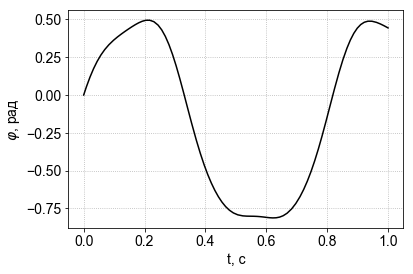

In [40]:
plt.plot(sol.t, sol.y[0], 'k-');
plt.xlabel('t, c');
plt.ylabel('$\\varphi$, рад');
plt.grid(True,linestyle='dotted');

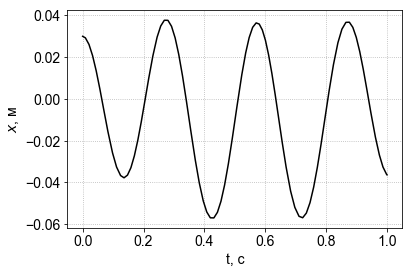

In [41]:
plt.plot(sol.t, sol.y[2], 'k-');
plt.xlabel('t, c');
plt.ylabel('$x$, м');
plt.grid(True,linestyle='dotted');

### Функция вычисления кинетической энергии системы

In [42]:
def kinetic_energy(t, q, p):
    phi = q[0]
    w   = q[1]
    x   = q[2]
    vx  = q[3]    
    
    g, m1, m2, c, L0, R = list(p)
    
    T = (3.0/8.0)*m1*R*R*w**2 + 0.5*m2*(w*w*(L0-0.5*np.sqrt(3)*R+x)**2+(vx-R*w)**2)
    
    return T

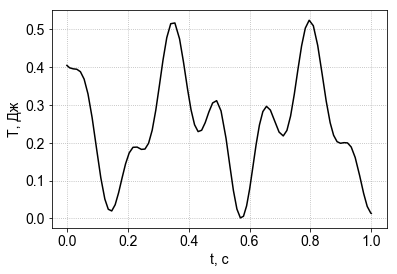

In [43]:
plt.plot(sol.t, kinetic_energy(sol.t,sol.y,p), 'k-');
plt.xlabel('t, c')
plt.ylabel('T, Дж');
plt.grid(True,linestyle='dotted');

### Функция вычисления потенциальной энергии системы

In [44]:
def potential_energy(t, q, p):
    phi = q[0]
    w   = q[1]
    x   = q[2]
    vx  = q[3]    
    
    g, m1, m2, c, L0, R = list(p)

    P = 0.5*(x*x*c + m2*g*(-2*L0+np.sqrt(3)*R-2*x)*np.sin(phi) - g*(m1+2*m2)*R*np.cos(phi))
    
    return P

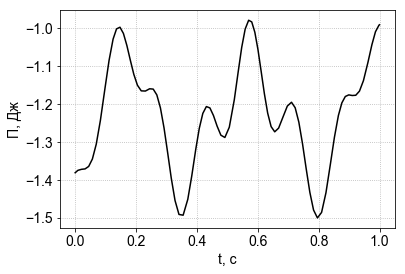

In [45]:
plt.plot(sol.t, potential_energy(sol.t,sol.y,p), 'k-');
plt.xlabel('t, c')
plt.ylabel('П, Дж');
plt.grid(True,linestyle='dotted');

### Полная энергия $T+\Pi = \text{const}$ 

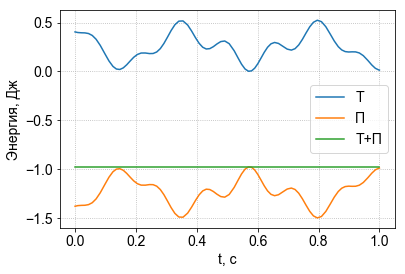

In [46]:
E = kinetic_energy(sol.t,sol.y,p) + potential_energy(sol.t,sol.y,p)

plt.plot(sol.t, kinetic_energy(sol.t,sol.y,p), sol.t, potential_energy(sol.t,sol.y,p), sol.t, E);
plt.grid(True,linestyle='dotted');
plt.xlabel('t, c')
plt.ylabel('Энергия, Дж')
plt.legend(['T','П','T+П']);